In [2]:
import os.path as osp

import torch
import torch.nn.functional as F
from sklearn.metrics import f1_score

from torch_geometric.loader import DataLoader
from torch_geometric.data import Dataset, Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GATConv
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from torch_geometric.nn import Node2Vec

torch.manual_seed(42)

In [3]:
%run dataset_nc_per_modeltype.ipynb

Processing...
Done!


DATASET LOADED: USE per_model variable !!!
EnterpriseModelDatasetNCPerModeltype(110)


In [4]:
per_model["info"]

{'Business Process Model': 43,
 'Goal Model': 6,
 'Product-Service-Model': 4,
 'Concepts Model': 10,
 'Technical Components and Requirements Model': 10,
 'Business Rule & Process Model': 12,
 'Goal & Business Rule Model': 7,
 '4EM General Model': 7,
 'Actors and Resources Model': 11}

In [5]:
# use only business process models
bpms = per_model["data"]["Business Process Model"]

print(f'Number of graphs total: {len(bpms)}')
print(bpms[1].y)

Number of graphs total: 43
tensor([23, 22, 23, 23, 22, 22, 22, 21, 21, 23, 23, 22, 23, 21, 23, 23, 22,  2,
        22, 21, 23, 22, 19,  1, 23, 22, 22, 23,  7, 23, 22,  2, 23, 23, 23, 22])


In [6]:
bpm_node_classes = []

for graph in bpms:
    for nclass in graph.y:
        bpm_node_classes.append(nclass.item())
    
bpm_node_classes = list(set(bpm_node_classes))
print(bpm_node_classes)

new_node_classes = []
map_old_to_new_node_class = {}

for i, old_index in enumerate(bpm_node_classes):
    new_node_classes.append(node_classes[old_index])
    map_old_to_new_node_class[old_index] = i
    
    
print(new_node_classes)
print(map_old_to_new_node_class)

[1, 2, 7, 19, 20, 21, 22, 23]
['External Process', 'Split (OR)', 'Join (OR)', 'Split (AND)', 'Join (AND)', 'Comment', 'Process', 'Information Set']
{1: 0, 2: 1, 7: 2, 19: 3, 20: 4, 21: 5, 22: 6, 23: 7}


In [7]:
final_classes = [0, 1, 2] # 0: Information Set, 1: Process, 2: Other

for graph in bpms:
    for i, nclass in enumerate(graph.y):
        if(new_node_classes[map_old_to_new_node_class[nclass.item()]] == "Information Set"):
            graph.y[i] = 0
        elif(new_node_classes[map_old_to_new_node_class[nclass.item()]] == "Process"):
            graph.y[i] = 1
        else:
            graph.y[i] = 2

In [8]:
dataset = bpms

In [9]:
dataset[0].y

tensor([1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0])

In [10]:
values, counts = np.unique(dataset[0].y, return_counts=True)
values, counts

(array([0, 1, 2], dtype=int64), array([4, 5, 2], dtype=int64))

In [11]:
len(dataset)

43

In [12]:
train_loader = DataLoader(bpms, batch_size=len(bpms), shuffle=False)

In [13]:
x = []
edge_index = []
edge_attr = []
y = []
train_mask = []
test_mask = []
for batch in train_loader:
    x = batch.x
    edge_index = batch.edge_index
    edge_attr = batch.edge_attr
    y = batch.y
    train_mask = batch.train_mask
    test_mask = batch.test_mask

    
data = Data(x=x, 
            edge_index=edge_index,
            edge_attr=edge_attr,
            y=y,
            train_mask=train_mask,
            test_mask=test_mask
            ) 

num_nodes = data.x.shape[0]
print(data)

Data(x=[835, 1], edge_index=[2, 836], edge_attr=[836, 1], y=[835], train_mask=[835], test_mask=[835])


In [14]:
values, counts = np.unique(data.y, return_counts=True)
values, counts

(array([0, 1, 2], dtype=int64), array([367, 308, 160], dtype=int64))

In [15]:
data.y[:10]

tensor([1, 0, 0, 0, 2, 1, 1, 1, 2, 1])

In [16]:
embedding_dim = 8

Epoch: 01, Loss: 1.9705, Acc: 0.4306
Epoch: 02, Loss: 1.7292, Acc: 0.4213
Epoch: 03, Loss: 1.5532, Acc: 0.4259
Epoch: 04, Loss: 1.4184, Acc: 0.4259
Epoch: 05, Loss: 1.2960, Acc: 0.4259
Epoch: 06, Loss: 1.2180, Acc: 0.4352
Epoch: 07, Loss: 1.1685, Acc: 0.4306
Epoch: 08, Loss: 1.1038, Acc: 0.4213
Epoch: 09, Loss: 1.0745, Acc: 0.4306
Epoch: 10, Loss: 1.0252, Acc: 0.4306
Epoch: 11, Loss: 0.9926, Acc: 0.4306
Epoch: 12, Loss: 0.9691, Acc: 0.4213
Epoch: 13, Loss: 0.9512, Acc: 0.4306
Epoch: 14, Loss: 0.9371, Acc: 0.4259
Epoch: 15, Loss: 0.9239, Acc: 0.4352
Epoch: 16, Loss: 0.9059, Acc: 0.4259
Epoch: 17, Loss: 0.8944, Acc: 0.4213
Epoch: 18, Loss: 0.8877, Acc: 0.4213
Epoch: 19, Loss: 0.8789, Acc: 0.4120
Epoch: 20, Loss: 0.8767, Acc: 0.4167
Epoch: 21, Loss: 0.8673, Acc: 0.4167
Epoch: 22, Loss: 0.8612, Acc: 0.4167
Epoch: 23, Loss: 0.8562, Acc: 0.4167
Epoch: 24, Loss: 0.8500, Acc: 0.4167
Epoch: 25, Loss: 0.8475, Acc: 0.4213
Epoch: 26, Loss: 0.8475, Acc: 0.4167
Epoch: 27, Loss: 0.8506, Acc: 0.4167
E

C:\Users\alber\anaconda3\envs\pyg_env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\alber\anaconda3\envs\pyg_env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


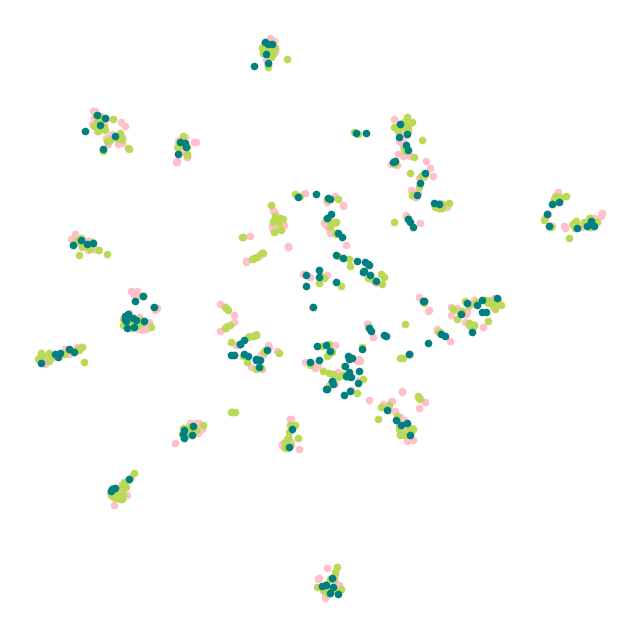

In [66]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=embedding_dim, walk_length=15,
                 context_size=10, walks_per_node=10,
                 num_negative_samples=1, p=1, q=1, sparse=True).to(device)

num_workers = 0
loader = model.loader(batch_size=64, shuffle=True, num_workers=num_workers)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc

loss_values = []
acc_values = []
for epoch in range(1, 101):
    loss = train()
    acc = test()
    loss_values.append(loss)
    acc_values.append(acc)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')

@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model(torch.arange(data.num_nodes, device=device))
    z = TSNE(n_components=2).fit_transform(z.cpu().numpy())
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(len(new_node_classes)):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()

colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535',
    '#ffd700', '#9900ff', '#008080', '#420420', '#7fe5f0', '#065535',
    '#008080', '#420420', '#7fe5f0', '#ff00ff', '#993366', '#ff5050',
    '#ff9933', '#ffff66', '#ffffcc', '#0066cc', '#00cc66', '#333300',
    '#996600', '#99ff66', '#cc99ff', '#336699', '#33cc33', '#339966',
    '#cc9900', '#66ff66', '#6666ff', '#009999', '#666699', '#ffcccc',
]
plot_points(colors)

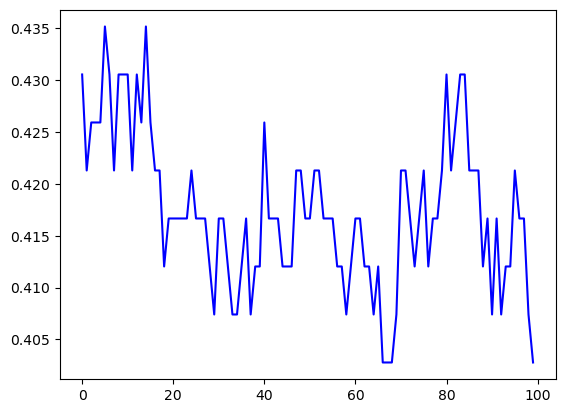

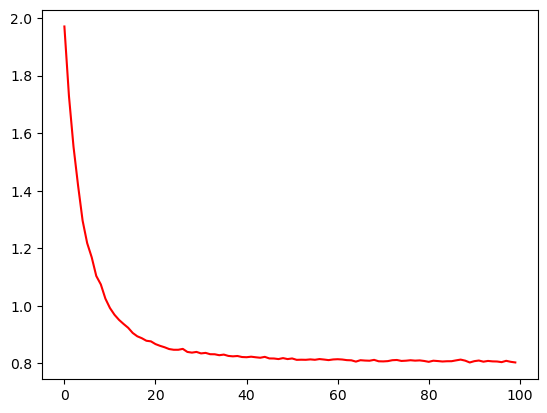

In [67]:
plt.plot(acc_values, 'b',)
plt.savefig('node2vec_acc.png')
plt.show()

plt.plot(loss_values, 'r')
plt.savefig('node2vec_loss.png')
plt.show()

In [68]:
z = model()
z[0]

tensor([ 0.1687,  0.0440, -0.2328, -0.0811,  0.1562, -0.0006,  0.4476,  0.0410],
       grad_fn=<SelectBackward0>)

In [69]:
 embeddings = []
for emb in z:
    new = []
    for val in emb:
        new.append(val.item())
    embeddings.append(new)

len(embeddings)

835

In [70]:
bpms[0]
bpms[0].x.shape

torch.Size([11, 1])

In [71]:
data_emb = []
i = 0
for graph in bpms:
    emb = []
    edge_index = graph.edge_index
    edge_attr = graph.edge_attr
    y = graph.y
    train_mask = graph.train_mask
    test_mask = graph.test_mask
    for j, _ in enumerate(graph.x):
        emb.append(embeddings[i])
        i += 1
        
    new_data = Data(x=torch.tensor(emb, dtype=torch.float), 
            edge_index=edge_index,
            edge_attr=edge_attr,
            y=y,
            train_mask=train_mask,
            test_mask=test_mask
            )
    data_emb.append(new_data)

In [72]:
data_emb[0].x.shape[1]

8

In [73]:
dataset = data_emb

train_dataset = dataset[:int(len(dataset) * 1)]

print(f'Number of graphs total: {len(dataset)}')
print(f'Number of training graphs: {len(train_dataset)}')
print(dataset[0])

Number of graphs total: 43
Number of training graphs: 43
Data(x=[11, 8], edge_index=[2, 11], edge_attr=[11, 1], y=[11], train_mask=[11], test_mask=[11])


In [80]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Dataset, Data

NUM_GRAPHS_PER_BATCH = 8
hidden_channels = 32

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [81]:
class GATGNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GATConv(embedding_dim, hidden_channels, heads=4, edge_dim=1)
        self.lin1 = torch.nn.Linear(embedding_dim, 4 * hidden_channels)
        
        self.conv2 = GATConv(4 * hidden_channels, hidden_channels, heads=4, edge_dim=1)
        self.lin2 = torch.nn.Linear(4 * hidden_channels, 4 * hidden_channels)
        
        
        self.conv3 = GATConv(4 * hidden_channels, len(final_classes), heads=6, concat=False, edge_dim=1)
        self.lin3 = torch.nn.Linear(4 * hidden_channels, len(final_classes))

        
    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = F.elu(self.conv1(x, edge_index, edge_attr) + self.lin1(x))
        x = F.elu(self.conv2(x, edge_index, edge_attr) + self.lin2(x))
        x = self.conv3(x, edge_index, edge_attr) + self.lin3(x)
        return F.log_softmax(x, dim=1)

In [82]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GATGNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GATGNN(
  (conv1): GATConv(8, 32, heads=4)
  (lin1): Linear(in_features=8, out_features=128, bias=True)
  (conv2): GATConv(128, 32, heads=4)
  (lin2): Linear(in_features=128, out_features=128, bias=True)
  (conv3): GATConv(128, 3, heads=6)
  (lin3): Linear(in_features=128, out_features=3, bias=True)
)
Number of parameters:  39118


In [83]:
def train():
    model.train()

    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        total_loss += loss.item() * data.num_graphs
        loss.backward()
        optimizer.step()
    return total_loss / len(train_loader.dataset)

In [84]:
@torch.no_grad()
def test():
    model.eval()

    total_acc = 0
    for data in train_loader:
        pred = model(data).argmax(dim=1)
        correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
        acc = int(correct) / int(data.test_mask.sum())
        total_acc += acc * data.num_graphs
    return total_acc / len(train_loader.dataset)

@torch.no_grad()
def test_train():
    model.eval()

    total_acc = 0
    for data in train_loader:
        pred = model(data).argmax(dim=1)
        correct = (pred[data.train_mask] == data.y[data.train_mask]).sum()
        acc = int(correct) / int(data.train_mask.sum())
        total_acc += acc * data.num_graphs
    return total_acc / len(train_loader.dataset)

Epoch: 001, Loss: 1.1505, Train Acc: 0.4269, Test Acc: 0.3507
Epoch: 002, Loss: 1.0862, Train Acc: 0.4463, Test Acc: 0.4208
Epoch: 003, Loss: 1.0491, Train Acc: 0.3945, Test Acc: 0.3659
Epoch: 004, Loss: 1.0390, Train Acc: 0.4514, Test Acc: 0.4299
Epoch: 005, Loss: 1.0328, Train Acc: 0.4764, Test Acc: 0.4500
Epoch: 006, Loss: 1.0195, Train Acc: 0.4340, Test Acc: 0.3763
Epoch: 007, Loss: 1.0193, Train Acc: 0.4728, Test Acc: 0.4183
Epoch: 008, Loss: 1.0174, Train Acc: 0.4676, Test Acc: 0.3683
Epoch: 009, Loss: 1.0092, Train Acc: 0.4805, Test Acc: 0.3829
Epoch: 010, Loss: 1.0103, Train Acc: 0.4872, Test Acc: 0.3689
Epoch: 011, Loss: 1.0065, Train Acc: 0.4981, Test Acc: 0.3789
Epoch: 012, Loss: 1.0090, Train Acc: 0.4921, Test Acc: 0.3904
Epoch: 013, Loss: 1.0051, Train Acc: 0.4780, Test Acc: 0.4113
Epoch: 014, Loss: 1.0139, Train Acc: 0.4552, Test Acc: 0.3683
Epoch: 015, Loss: 1.0126, Train Acc: 0.4950, Test Acc: 0.3981
Epoch: 016, Loss: 1.0001, Train Acc: 0.4739, Test Acc: 0.3955
Epoch: 0

Epoch: 134, Loss: 0.5322, Train Acc: 0.7898, Test Acc: 0.5102
Epoch: 135, Loss: 0.5121, Train Acc: 0.7710, Test Acc: 0.5374
Epoch: 136, Loss: 0.5205, Train Acc: 0.7755, Test Acc: 0.4945
Epoch: 137, Loss: 0.5371, Train Acc: 0.7997, Test Acc: 0.5343
Epoch: 138, Loss: 0.5165, Train Acc: 0.8000, Test Acc: 0.5398
Epoch: 139, Loss: 0.5248, Train Acc: 0.7812, Test Acc: 0.5268
Epoch: 140, Loss: 0.5289, Train Acc: 0.8040, Test Acc: 0.5703
Epoch: 141, Loss: 0.4945, Train Acc: 0.7821, Test Acc: 0.5549
Epoch: 142, Loss: 0.5333, Train Acc: 0.8080, Test Acc: 0.5694
Epoch: 143, Loss: 0.4775, Train Acc: 0.8084, Test Acc: 0.5680
Epoch: 144, Loss: 0.5003, Train Acc: 0.8003, Test Acc: 0.5599
Epoch: 145, Loss: 0.5129, Train Acc: 0.8235, Test Acc: 0.5189
Epoch: 146, Loss: 0.4438, Train Acc: 0.8292, Test Acc: 0.5462
Epoch: 147, Loss: 0.4492, Train Acc: 0.8341, Test Acc: 0.5320
Epoch: 148, Loss: 0.4338, Train Acc: 0.8382, Test Acc: 0.5507
Epoch: 149, Loss: 0.4323, Train Acc: 0.8323, Test Acc: 0.5208
Epoch: 1

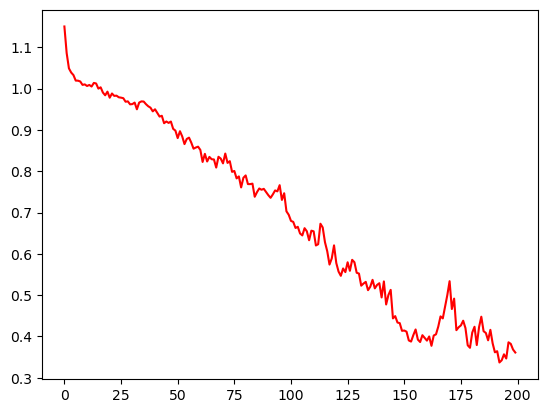

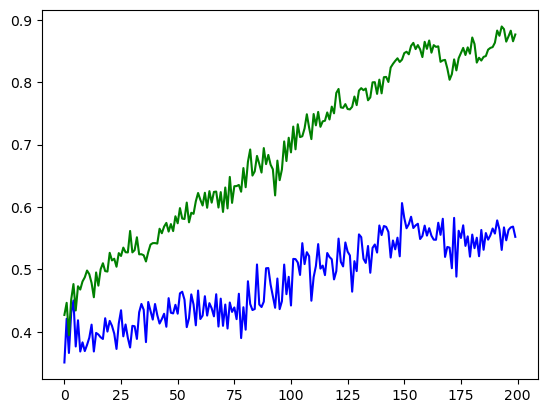

In [85]:
loss_values = []
train_acc_values = []
test_acc_values = []

for epoch in range(1, 201):
    loss = train()
    test_acc = test()
    train_acc = test_train()
    
    loss_values.append(loss)
    test_acc_values.append(test_acc)
    train_acc_values.append(train_acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
    if(acc > 0.61): break

plt.plot(loss_values, 'r',)
plt.savefig('loss_nc.png')
plt.show()
plt.plot(test_acc_values, 'b', train_acc_values, 'g')

plt.savefig('acc_nc.png')
plt.show()